## Capstone Project - Inferential Statistics

## Introduction
In this notebook, I am going to do Inferential Statistics to discover insights into what variables could be significant for my questions about the data previously proposed, and how they explain my answers to these questions.
<ul>
<li>Using Descirption Statistics to analyze each variable of data, and realtionships between variables.
<li>Doing Hypothesis testing on the relationships between "review_length" and "feedback".
</ul>

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
%matplotlib inline

In [2]:
df=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [3]:
print('Shape of DataFrame is {}'.format(df.shape))
df.head()

Shape of DataFrame is (3150, 5)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [9]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


#### 1. Rating

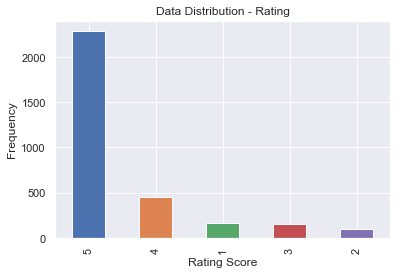

In [62]:
sns.set()
df['rating'].value_counts().plot(kind='bar')
plt.title('Data Distribution - Rating')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Boxplot - Rating')

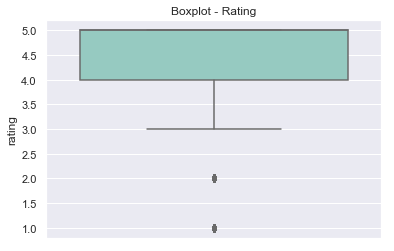

In [20]:
ax = sns.boxplot(y='rating', hue="rating",data=df, palette="Set3")
ax.set_title('Boxplot - Rating')

<b>Analysis:</b> As we see from the plots, most reviews give high rating score.

#### 2. Feedback

1    2893
0     257
Name: feedback, dtype: int64


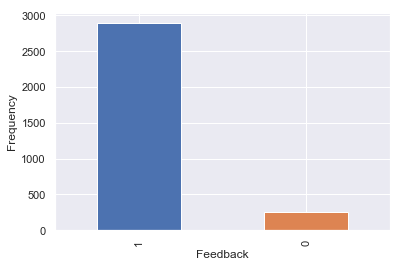

In [21]:
print(df['feedback'].value_counts())

df['feedback'].value_counts().plot(kind='bar')
plt.xlabel('Feedback')
plt.ylabel('Frequency')
plt.show()

<b>Analysis:</b> The data is a bit imbalanced.

Text(0.5, 1.0, 'Relationship between Rating and Feedback')

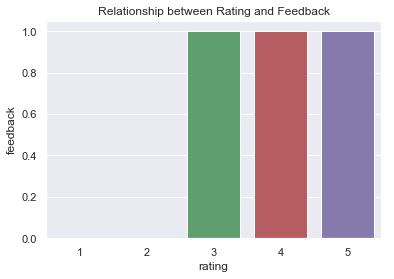

In [73]:
ax = sns.barplot(x="rating", y='feedback',data=df)
ax.set_title('Relationship between Rating and Feedback')


Text(0.5, 1.0, 'Relationship between Rating and Feedback')

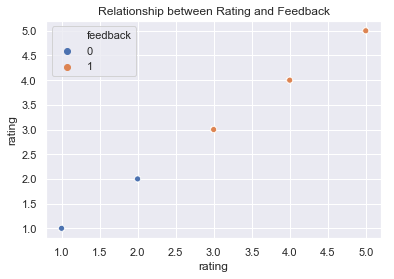

In [75]:
ax = sns.scatterplot(x='rating',y='rating',hue='feedback',data=df)
ax.set_title('Relationship between Rating and Feedback')

<b>Anaysis:</b> As showed from the plots, Rating Scores equal or less than 2 are negative feedback, and  Rating Scores equal or more than 3 are positive feedback.

#### 3. Variation

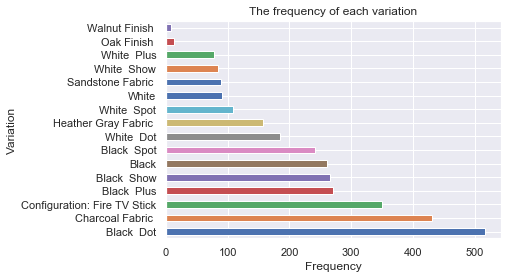

In [81]:
df['variation'].value_counts().plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Variation')
plt.title('The frequency of each variation')
plt.show()

<b>Analysis:</b> We might get the information about which variations got higher amount of sale.

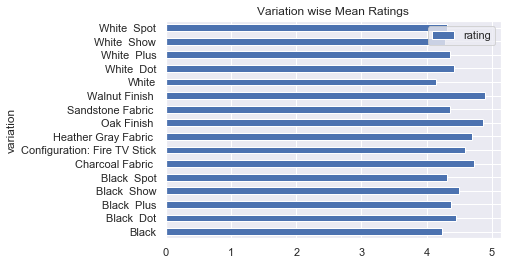

In [84]:
df.groupby('variation').mean()[['rating']].plot.barh()
plt.title("Variation wise Mean Ratings");

<b>Analysis:</b> We might get the information about which variations got higher rating.

#### 4. Verified_reviews

In [86]:
df.loc[df['verified_reviews']==' ']


,rating,date,variation,verified_reviews,feedback
85,5,30-Jul-18,Heather Gray Fabric,,1
183,3,29-Jul-18,Heather Gray Fabric,,1
219,5,29-Jul-18,Sandstone Fabric,,1
374,1,26-Jul-18,Black,,0
406,1,16-Jul-18,White,,0
524,2,20-Jun-18,White,,0
654,5,26-May-18,Black,,1
780,5,30-Jul-18,Heather Gray Fabric,,1
878,3,29-Jul-18,Heather Gray Fabric,,1
914,5,29-Jul-18,Sandstone Fabric,,1


<b>Analysis:</b> We can see the value of Verified_reviews is set to ' ' if there is no review. This is the way of processing missing value in this project.

In [87]:
df['review_length']=df['verified_reviews'].str.len()
pd.DataFrame(df.review_length.describe()).T

,count,mean,std,min,25%,50%,75%,max
review_length,3150.0,132.049524,182.099952,1.0,30.0,74.0,165.0,2851.0


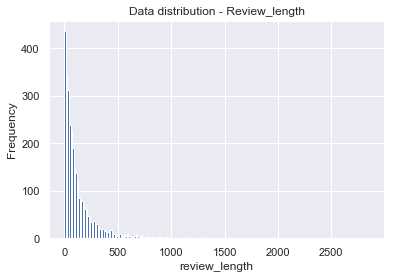

In [89]:
df['review_length'].plot(kind='hist',bins=200)
plt.title('Data distribution - Review_length')
plt.xlabel('review_length')
plt.show()

<b>Analysis:</b> The plot shows most reviews are short.

Text(0, 0.5, 'Mean of review_length')

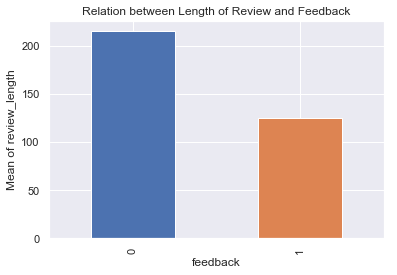

In [91]:
test=df.groupby('feedback').mean()
test['review_length'].plot(kind='bar',title='Relation between Length of Review and Feedback')
plt.ylabel('Mean of review_length')

Text(0.5, 1.0, 'Review Length per Feedback')

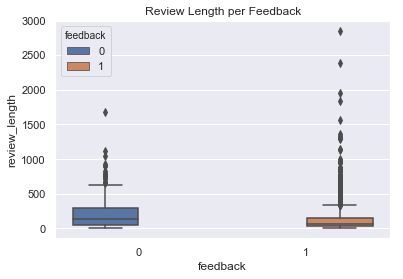

In [96]:
ax = sns.boxplot(x='feedback',y='review_length',hue='feedback',data=df)
ax.set_title('Review Length per Feedback')

<b>Analysis: </b>It seems the length of reviews is negativly related to feedback, which means there could be significant difference in the length between positive and negative reviews. I am going to use Hypothesis testing to discover insight into it. 
<br>
H0: review_length_negative - review_lengthe_positive = 0
<br>
H1: review_length_negative - review_lengthe_positive > 0

In [97]:
review_length_negative = df[df['feedback']==0]['review_length']
review_length_positive = df[df['feedback']==1]['review_length']

In [102]:
stats.ttest_ind(review_length_negative,review_length_positive)

Ttest_indResult(statistic=7.712835679990243, pvalue=1.6393106725879995e-14)

<b>Conclusion: </b>p-value < 0.01, so we can not accept the Null hypothesis. So there is significant difference in the length between positive and negative reviews.